In [167]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv


In [168]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,accuracy_score, classification_report


In [169]:
df = pd.read_csv("/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv")

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [171]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [172]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [173]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

for col in num_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

for col in cat_cols:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)

/tmp/ipykernel_36/514729498.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
/tmp/ipykernel_36/514729498.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.met

In [174]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


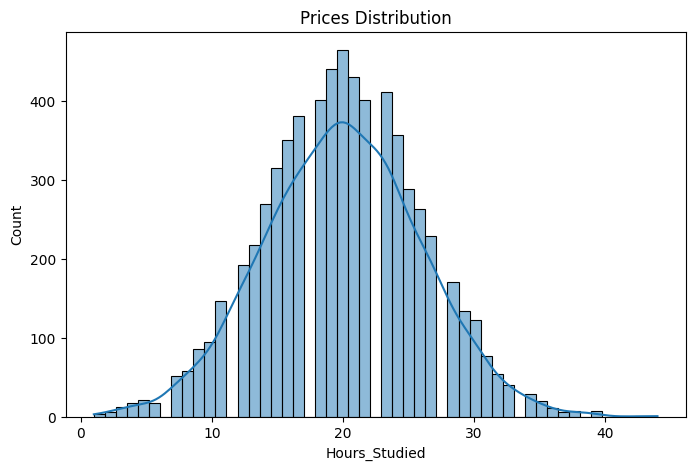

In [175]:
plt.figure(figsize=(8,5))
sns.histplot(df['Hours_Studied'], kde=True)
plt.title("Prices Distribution")
plt.show()

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


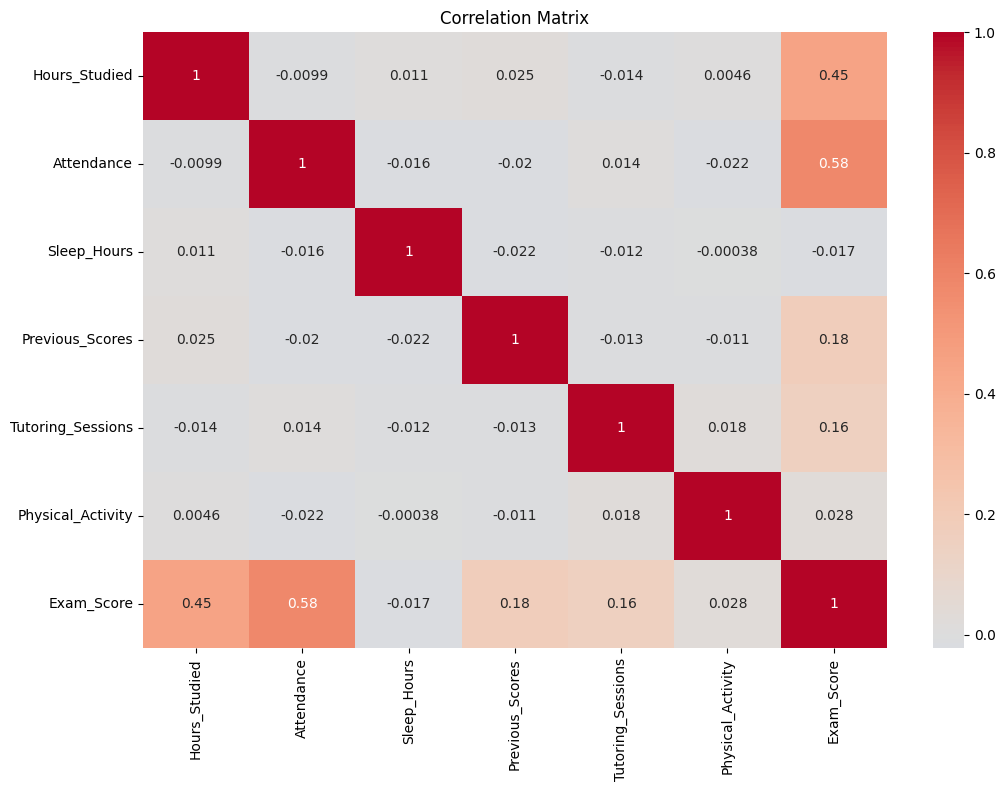

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

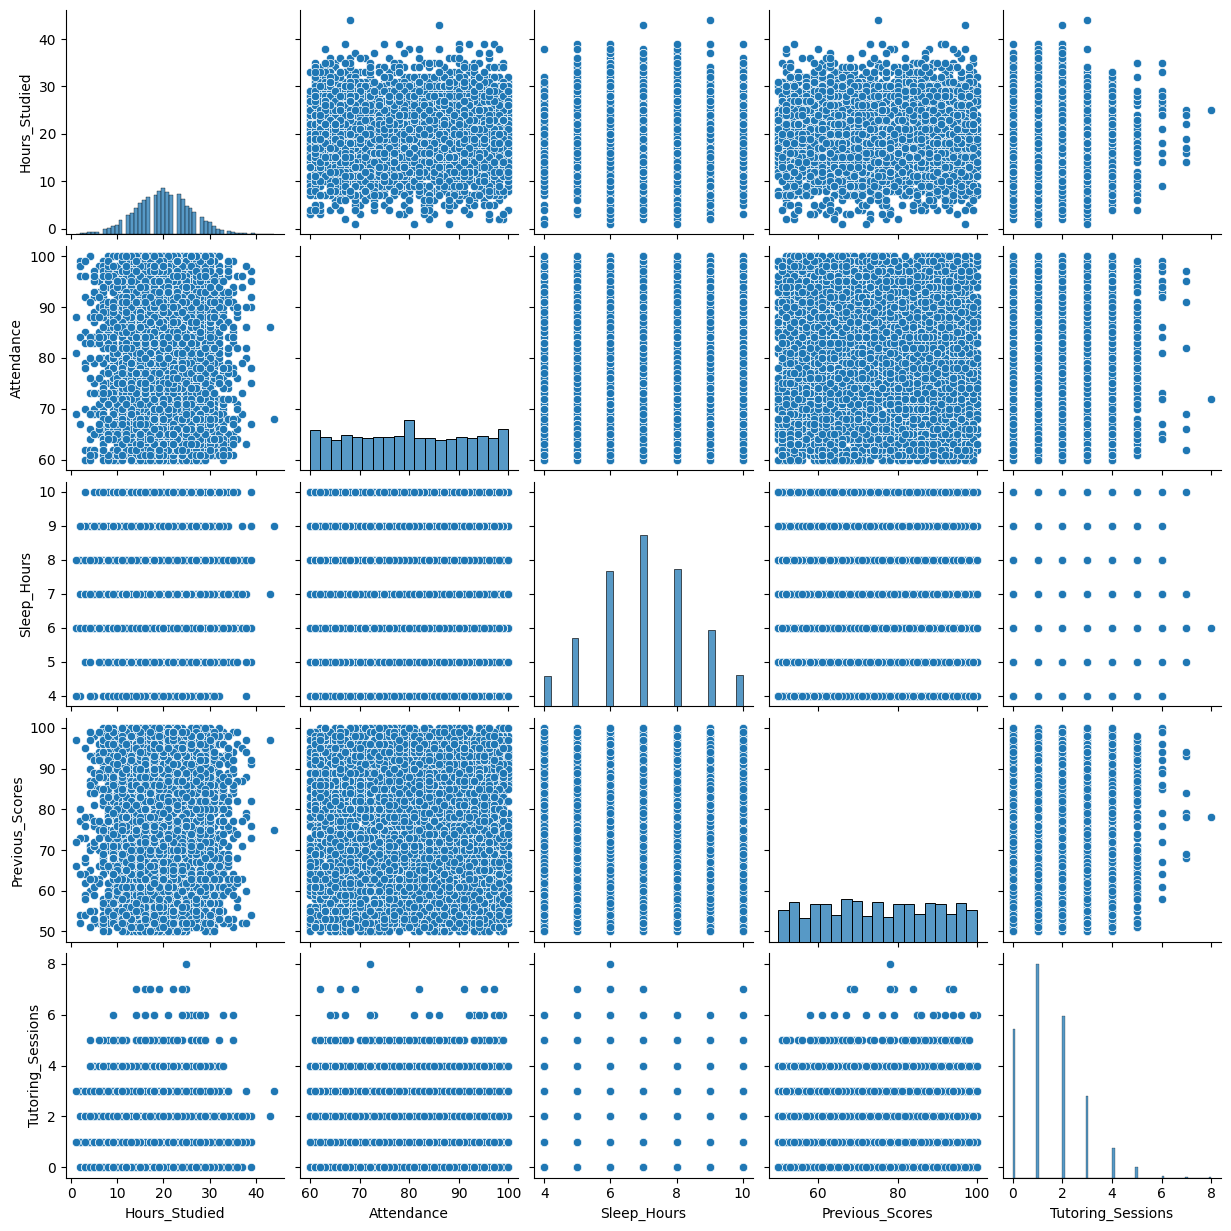

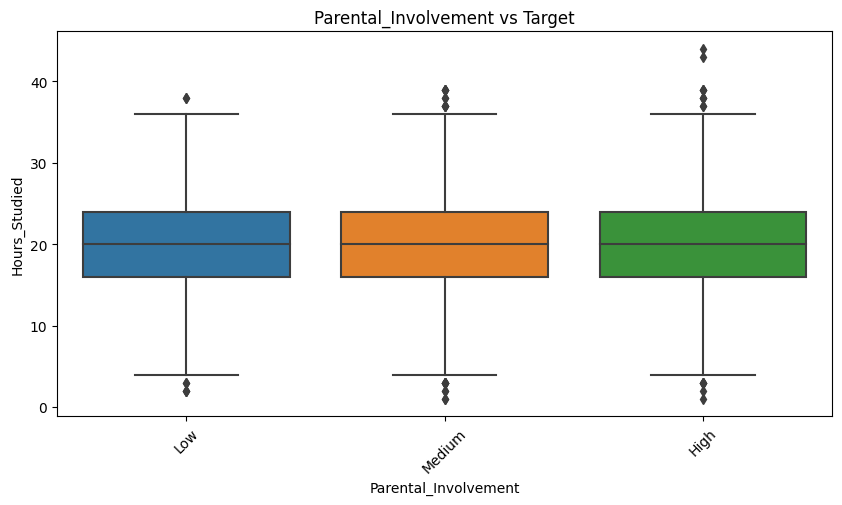

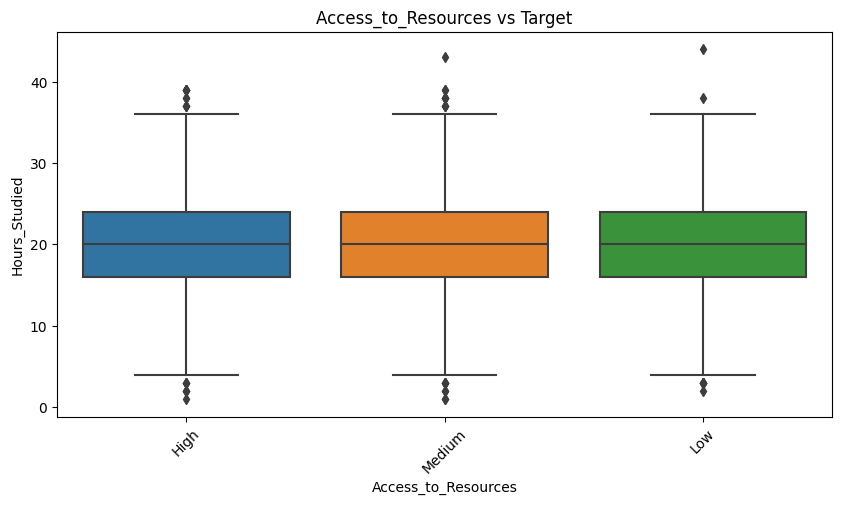

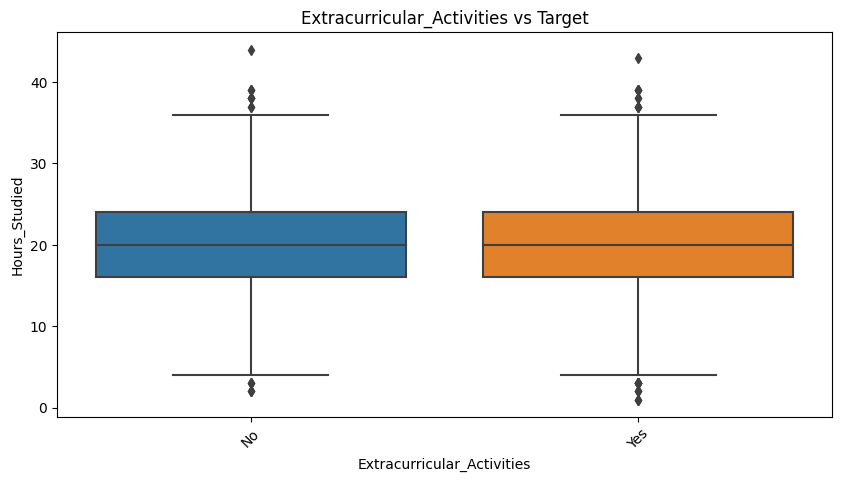

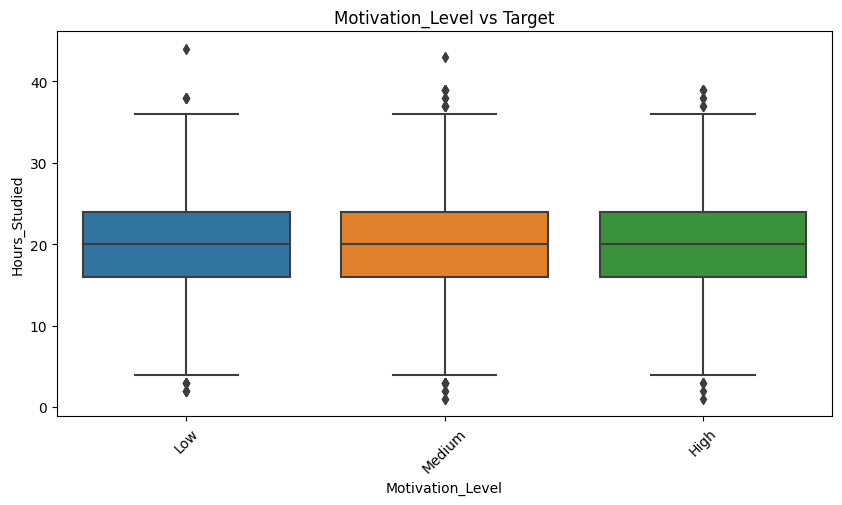

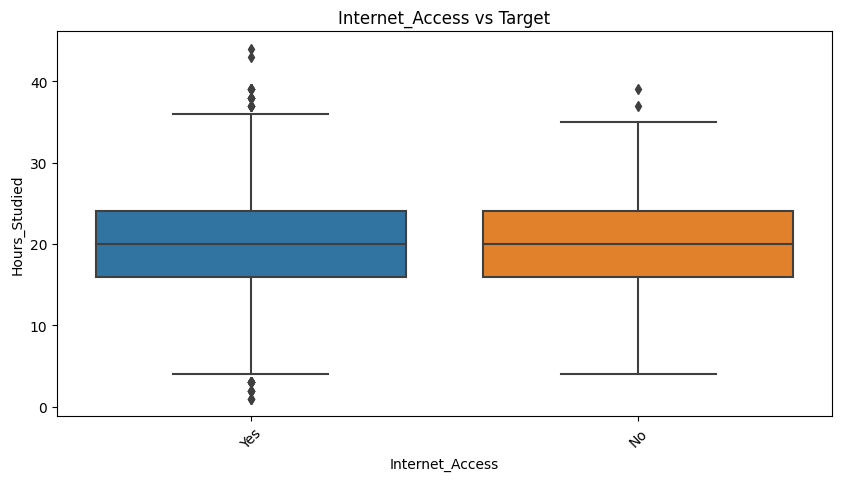

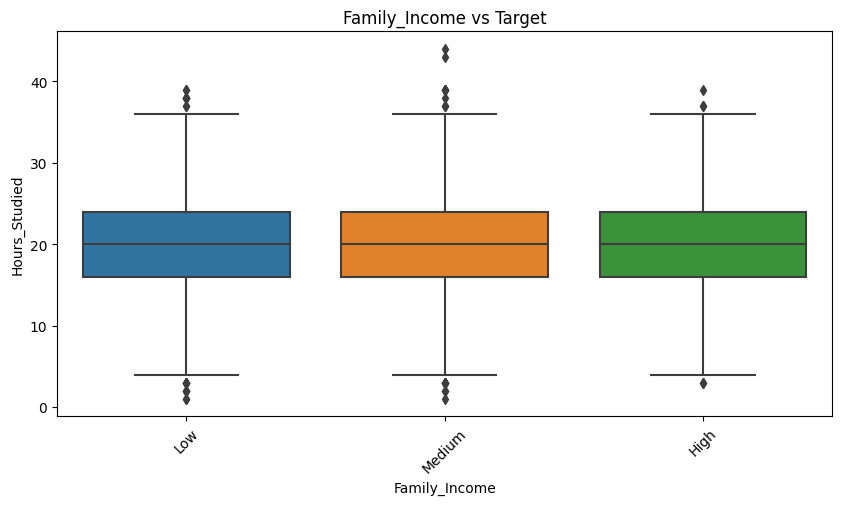

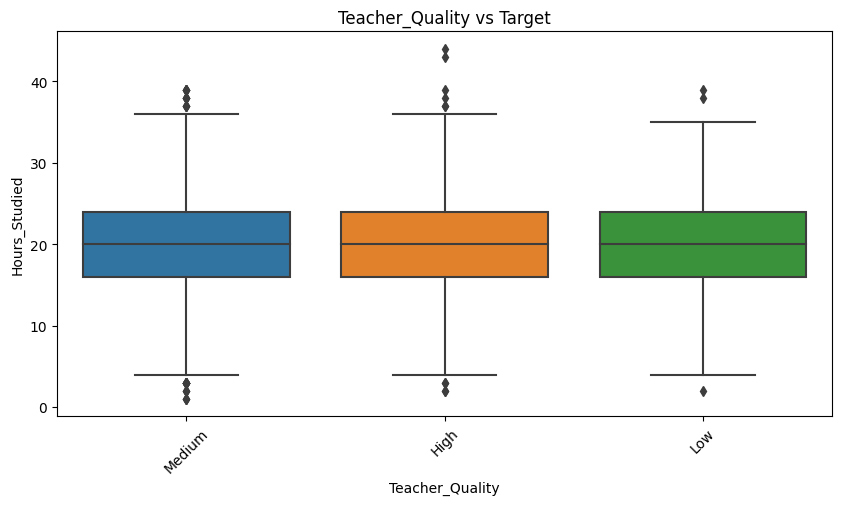

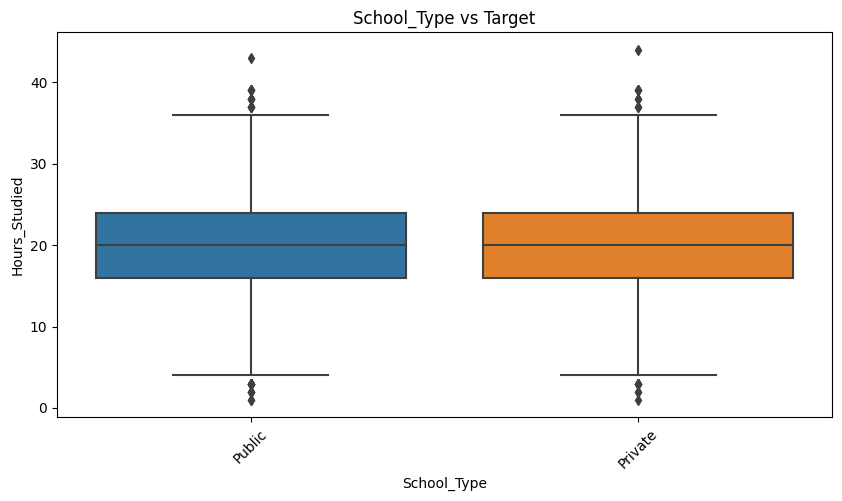

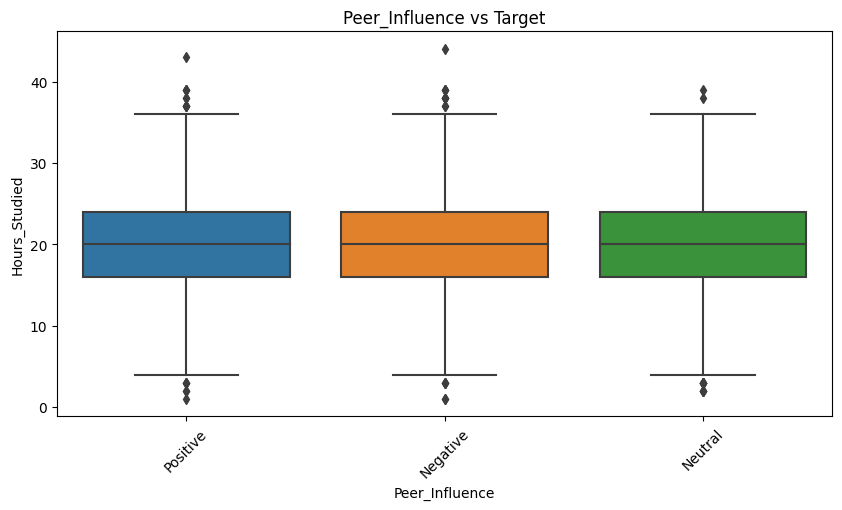

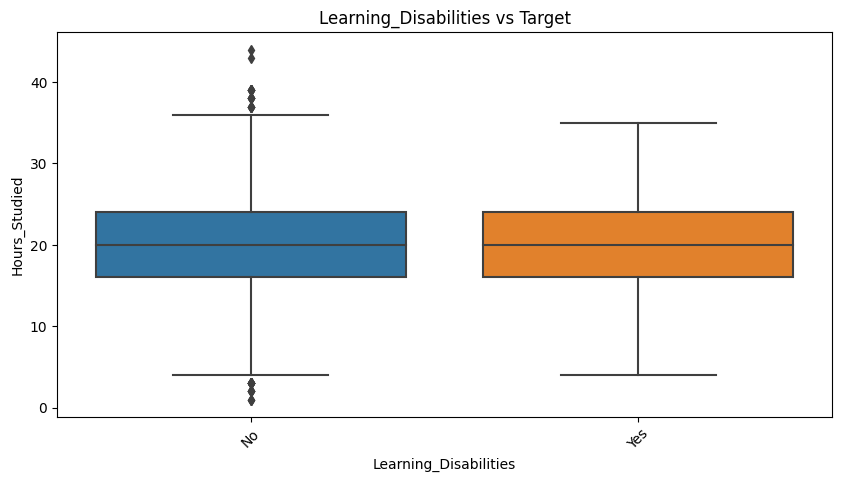

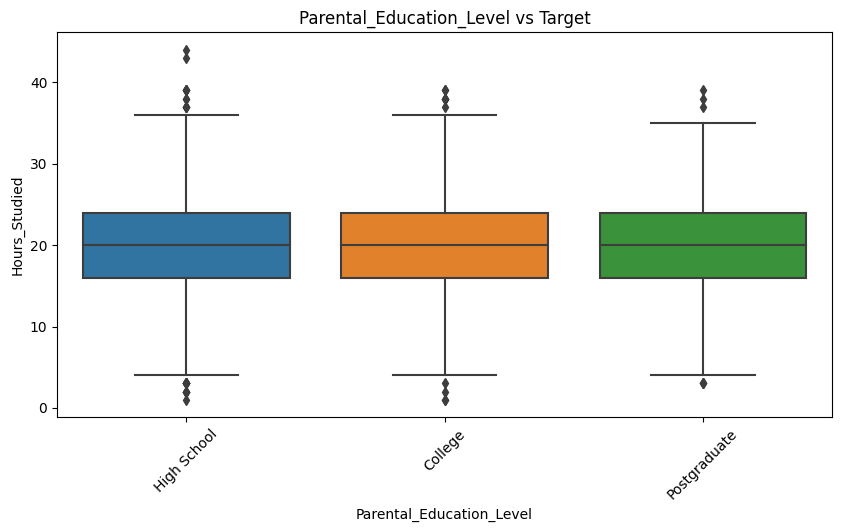

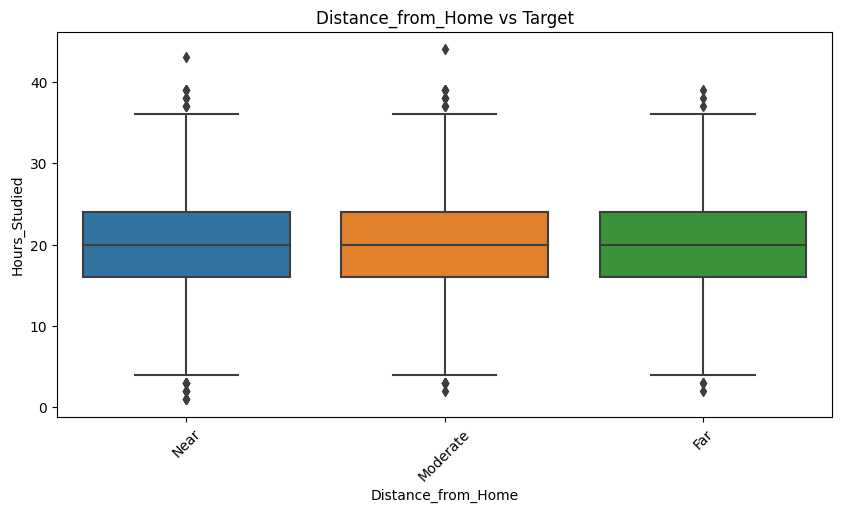

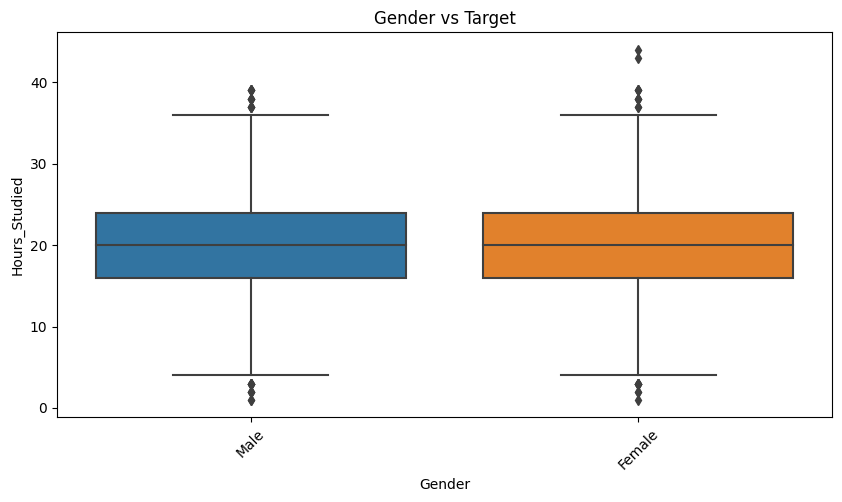

In [176]:
plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Pairplot for key numerical features
sns.pairplot(df[num_cols[:5]])  # Adjust number of columns as needed
plt.show()

# Categorical vs Target 
if 'Hours_Studied' in df.columns:
    for col in cat_cols:
        plt.figure(figsize=(10,5))
        sns.boxplot(data=df, x=col, y='Hours_Studied')
        plt.xticks(rotation=45)
        plt.title(f'{col} vs Target')
        plt.show()

In [177]:
df = pd.get_dummies(df, drop_first=True)

In [178]:
# Data Preprocessing
X = df.drop('Exam_Score',axis=1)
y = df['Exam_Score']


In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [180]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [181]:
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {"Model": name, "MAE": mae, "MSE": mse, "R2 Score": r2}

results = []

In [182]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [183]:
y_pred_lr = lr.predict(X_test_scaled)
results.append(evaluate_model("Linear Regression", y_test, y_pred_lr))

In [184]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [185]:
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)
y_pred_poly = lr_poly.predict(X_test_poly)
results.append(evaluate_model("Polynomial Regression (deg=2)", y_test, y_pred_poly))

In [186]:
features_subset = [
    col for col in X.columns 
    if isinstance(col, str) and "sleep" not in col.lower() and "participation" not in col.lower()
]
X_train_sub, X_test_sub = X_train[features_subset], X_test[features_subset]

X_train_sub_scaled = scaler.fit_transform(X_train_sub)
X_test_sub_scaled = scaler.transform(X_test_sub)

lr_sub = LinearRegression()
lr_sub.fit(X_train_sub_scaled, y_train)
y_pred_sub = lr_sub.predict(X_test_sub_scaled)
results.append(evaluate_model("Linear Regression (Without sleep/participation)", y_test, y_pred_sub))


In [187]:
# Results DataFrame
results_df = pd.DataFrame(results)
print(results_df)

                                             Model       MAE       MSE  \
0                                Linear Regression  0.452392  3.256020   
1                    Polynomial Regression (deg=2)  0.644435  3.583846   
2  Linear Regression (Without sleep/participation)  0.451374  3.253336   

   R2 Score  
0  0.769650  
1  0.746457  
2  0.769839  


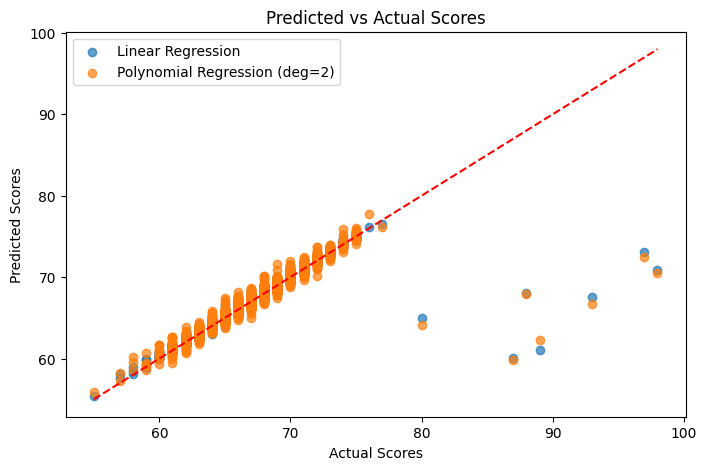

In [188]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_lr, label="Linear Regression", alpha=0.7)
plt.scatter(y_test, y_pred_poly, label="Polynomial Regression (deg=2)", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Predicted vs Actual Scores")
plt.legend()
plt.show()

In [189]:
#Permutation Importance
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(lr, X_test_scaled, y_test, n_repeats=20, random_state=42)
perm_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": perm_importance.importances_mean
}).sort_values(by="Importance", ascending=False)

print("\n Feature Importance (Permutation):")
print(perm_df)


 Feature Importance (Permutation):
                                  Feature  Importance
1                              Attendance    0.751944
0                           Hours_Studied    0.447191
8                 Access_to_Resources_Low    0.092122
6                Parental_Involvement_Low    0.089805
3                         Previous_Scores    0.066913
4                       Tutoring_Sessions    0.048686
14                      Family_Income_Low    0.043160
7             Parental_Involvement_Medium    0.040068
20                Peer_Influence_Positive    0.038668
9              Access_to_Resources_Medium    0.034702
11                   Motivation_Level_Low    0.034025
25                Distance_from_Home_Near    0.023267
16                    Teacher_Quality_Low    0.016244
15                   Family_Income_Medium    0.010624
12                Motivation_Level_Medium    0.009749
22   Parental_Education_Level_High School    0.009357
10         Extracurricular_Activities_Yes    0

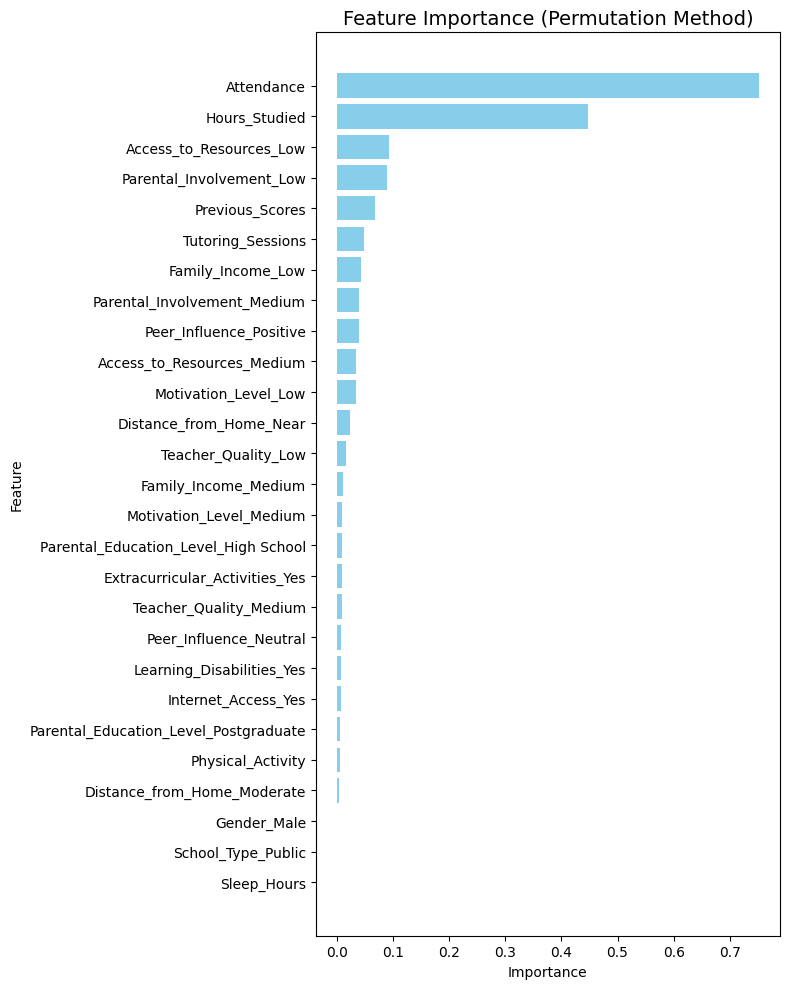

In [190]:
perm_sorted = perm_df.sort_values(by="Importance", ascending=True)

# رسم Bar Chart
plt.figure(figsize=(8, 10))
plt.barh(perm_sorted["Feature"], perm_sorted["Importance"], color="skyblue")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (Permutation Method)", fontsize=14)
plt.tight_layout()
plt.show()